# Aufgabe 1: Lineare kleinste Quadrate

In [14]:
import numpy as np
import matplotlib.pyplot as plt

In [15]:
x = np.array([-2, -1, 1, 2])
y = np.array([26, 0, 8, -10])

## Aufgabe 1.1

### Feature-Matrix

$$p(x) = b + w_1 x^3 + w_2 \sin \left( \frac{\pi}{2} x \right)$$

In [60]:
X = np.stack([np.ones(len(x)), x ** 3, np.sin(np.pi / 2 * x)]).T
print(np.round(X, decimals=4))

[[ 1. -8. -0.]
 [ 1. -1. -1.]
 [ 1.  1.  1.]
 [ 1.  8.  0.]]


### Normalengleichung

In [59]:
# alternativ: X.T@X
XTX = np.matmul(X.T, X)
print(np.round(XTX, decimals=4))

# alternativ: X.T@y
XTy = np.matmul(X.T, y)
print(XTy)

[[  4.   0.  -0.]
 [  0. 130.   2.]
 [ -0.   2.   2.]]
[  24. -280.    8.]


In [55]:
W = np.linalg.lstsq(XTX, XTy, rcond=None)[0]
print(W)

# test
print(np.linalg.lstsq(X, y, rcond=None)[0])

[ 6.   -2.25  6.25]
[ 6.   -2.25  6.25]


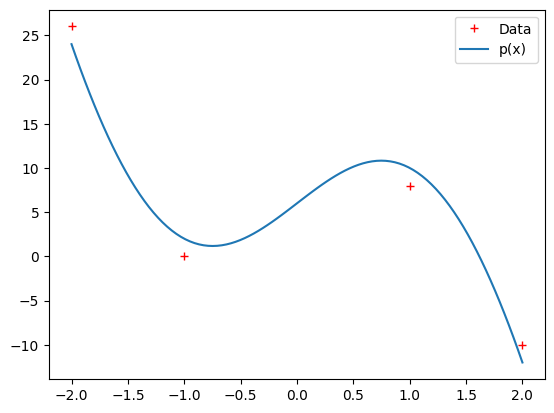

In [19]:
def p(x):
    return W[0] + W[1] * x ** 3 + W[2] * np.sin(np.pi / 2 * x)

x_plot = np.linspace(x[0], x[-1], 100)

plt.plot(x, y, 'r+', label='Data')
plt.plot(x_plot, p(x_plot), label='p(x)')
plt.legend()
plt.show()

### kleinste Quadrate-Fehler

In [20]:
r = y - np.matmul(X, W)
print(r)

err = np.linalg.norm(r, 2) ** 2
print(err)

[ 2. -2. -2.  2.]
16.0


## Aufgabe 1.2

In [58]:
round(p(3), 4)

-61.0

## Aufgabe 1.3

#### Aufgabe 1.3.1

In [57]:
X2 = np.vstack([np.ones(len(x)), x ** 3, np.sin(np.pi / 2 * x), np.cos(np.pi / 2 * x)]).T
print(np.round(X2, decimals=4))

[[ 1. -8. -0. -1.]
 [ 1. -1. -1.  0.]
 [ 1.  1.  1.  0.]
 [ 1.  8.  0. -1.]]


In [56]:
W2 = np.linalg.solve(X2, y)
print(W2)

err2 = np.linalg.norm(y - np.matmul(X2, W2), 2) ** 2
print(round(err2, 4))

[ 4.   -2.25  6.25 -4.  ]
0.0


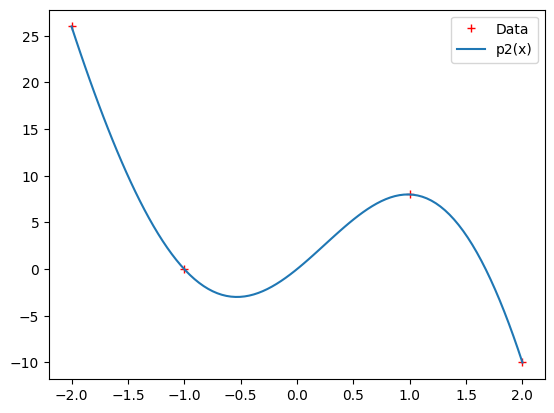

In [45]:
plt.plot(x, y, 'r+', label='Data')
plt.plot(x_plot, W2[0] + W2[1] * x_plot ** 3 + W2[2] * np.sin(np.pi / 2 * x_plot) + W2[3] * np.cos(np.pi / 2 * x_plot), label='p2(x)')
plt.legend()
plt.show()

### Aufgabe 1.3.2

In [54]:
X3 = np.vstack([np.ones(len(x)), x ** 3, np.sin(np.pi * x)]).T
print(np.round(X3, decimals=4))

np.round(X3.T@X3, decimals=4)

[[ 1. -8.  0.]
 [ 1. -1. -0.]
 [ 1.  1.  0.]
 [ 1.  8. -0.]]


array([[  4.,   0.,   0.],
       [  0., 130.,  -0.],
       [  0.,  -0.,   0.]])

$\implies$ nicht invertierbar, Lösung später